In [2]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Importing csv file

In [3]:
data = pd.read_csv('diabetes.csv')

Checking the no. of null entries

In [3]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Observation: We find that there is no null entry in the dataset currently.

Getting the no. of rows and columns

In [21]:
data.shape

(768, 9)

Now, we draw pairplots to observe the relation between attributes and the result individually.

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\user\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


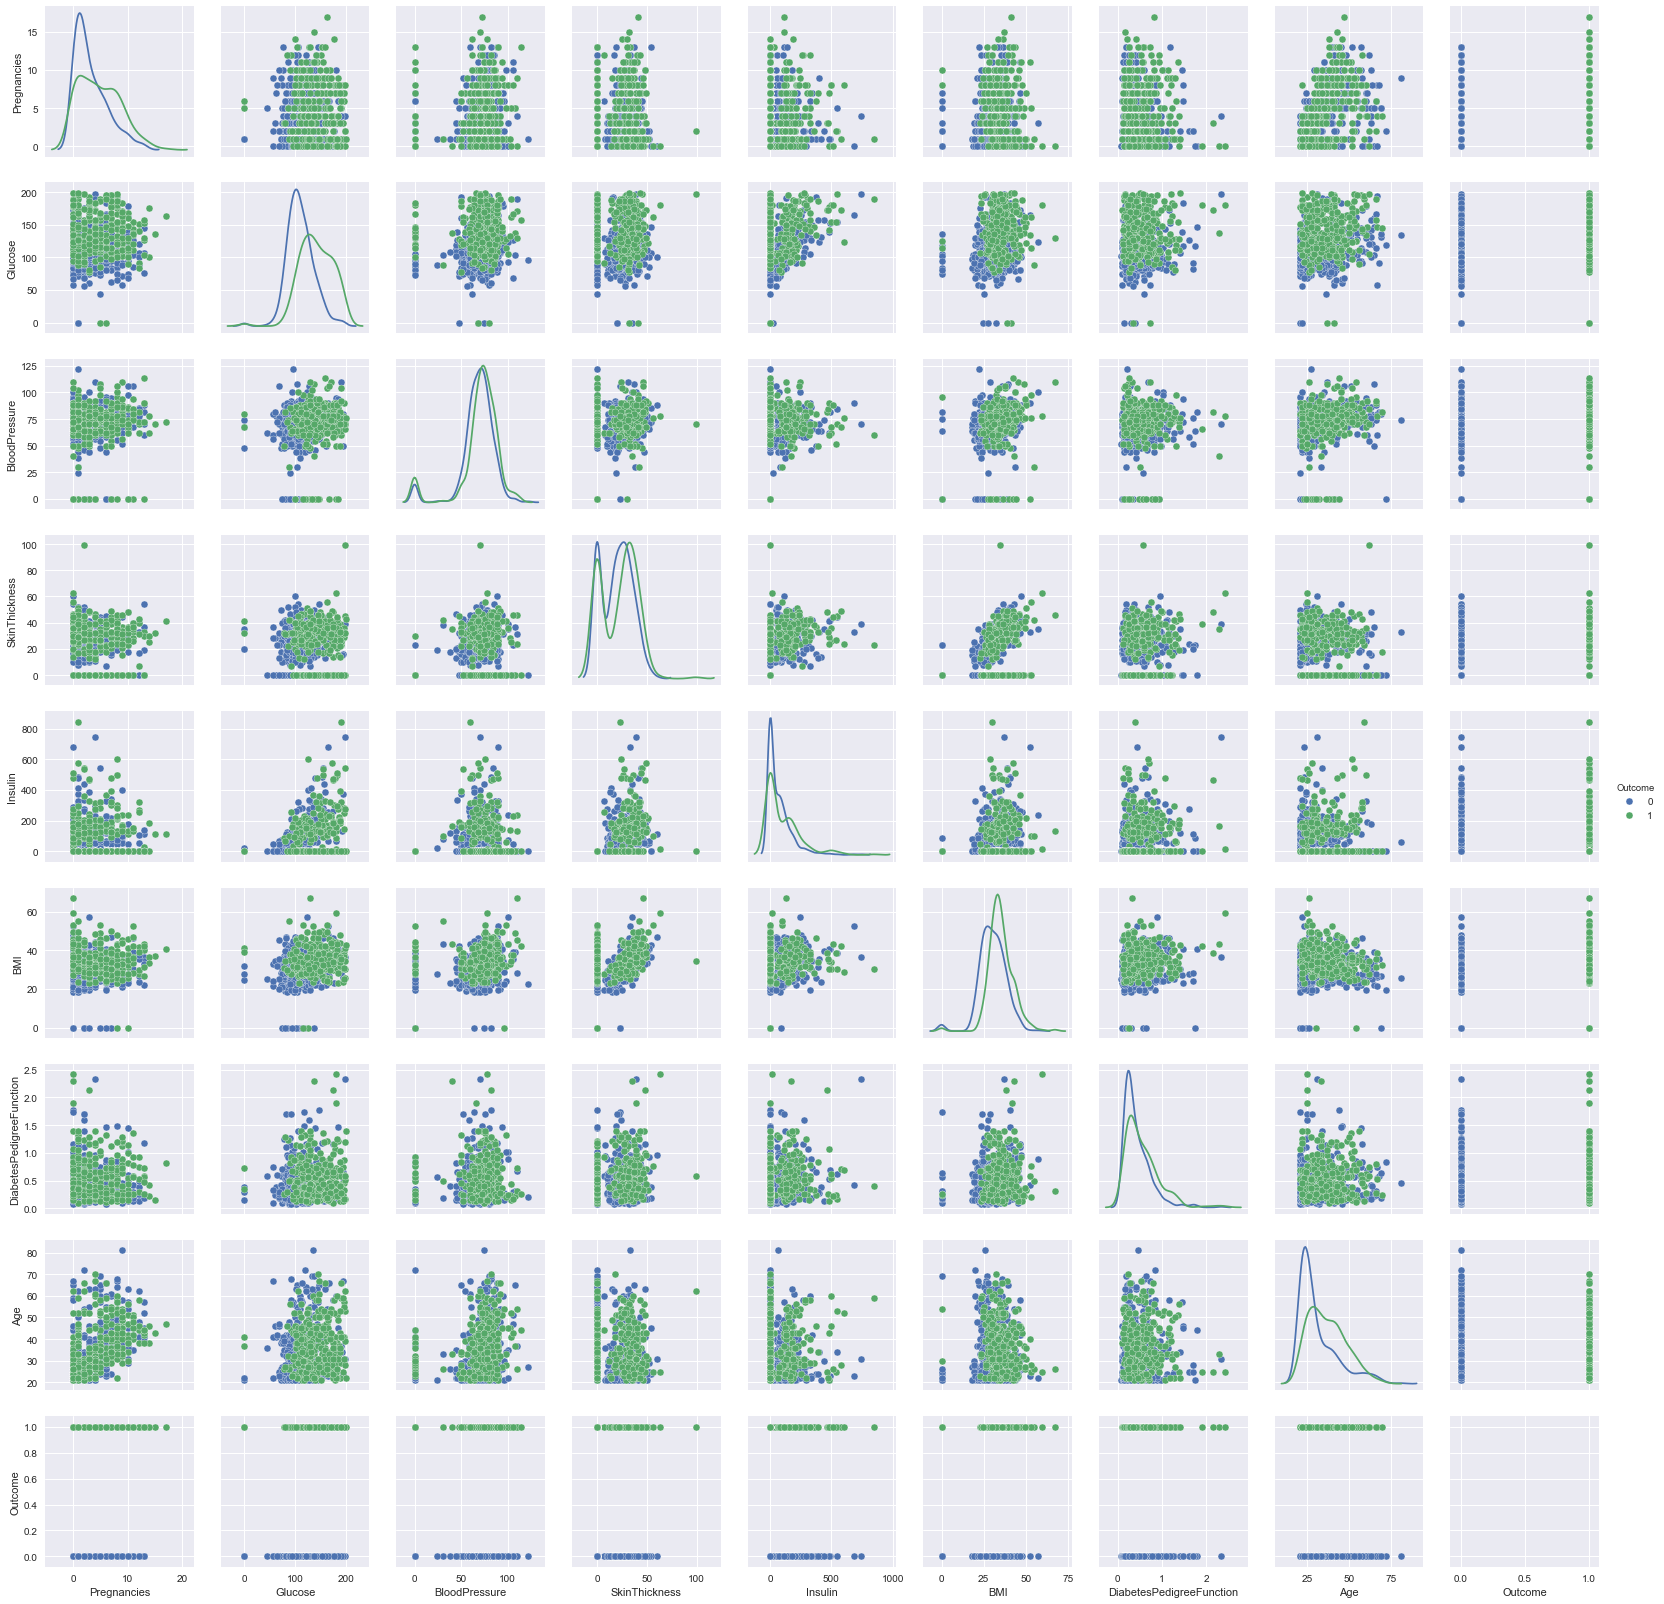

In [6]:
sns.pairplot(data = data, hue = 'Outcome', diag_kind = 'kde')
plt.show()

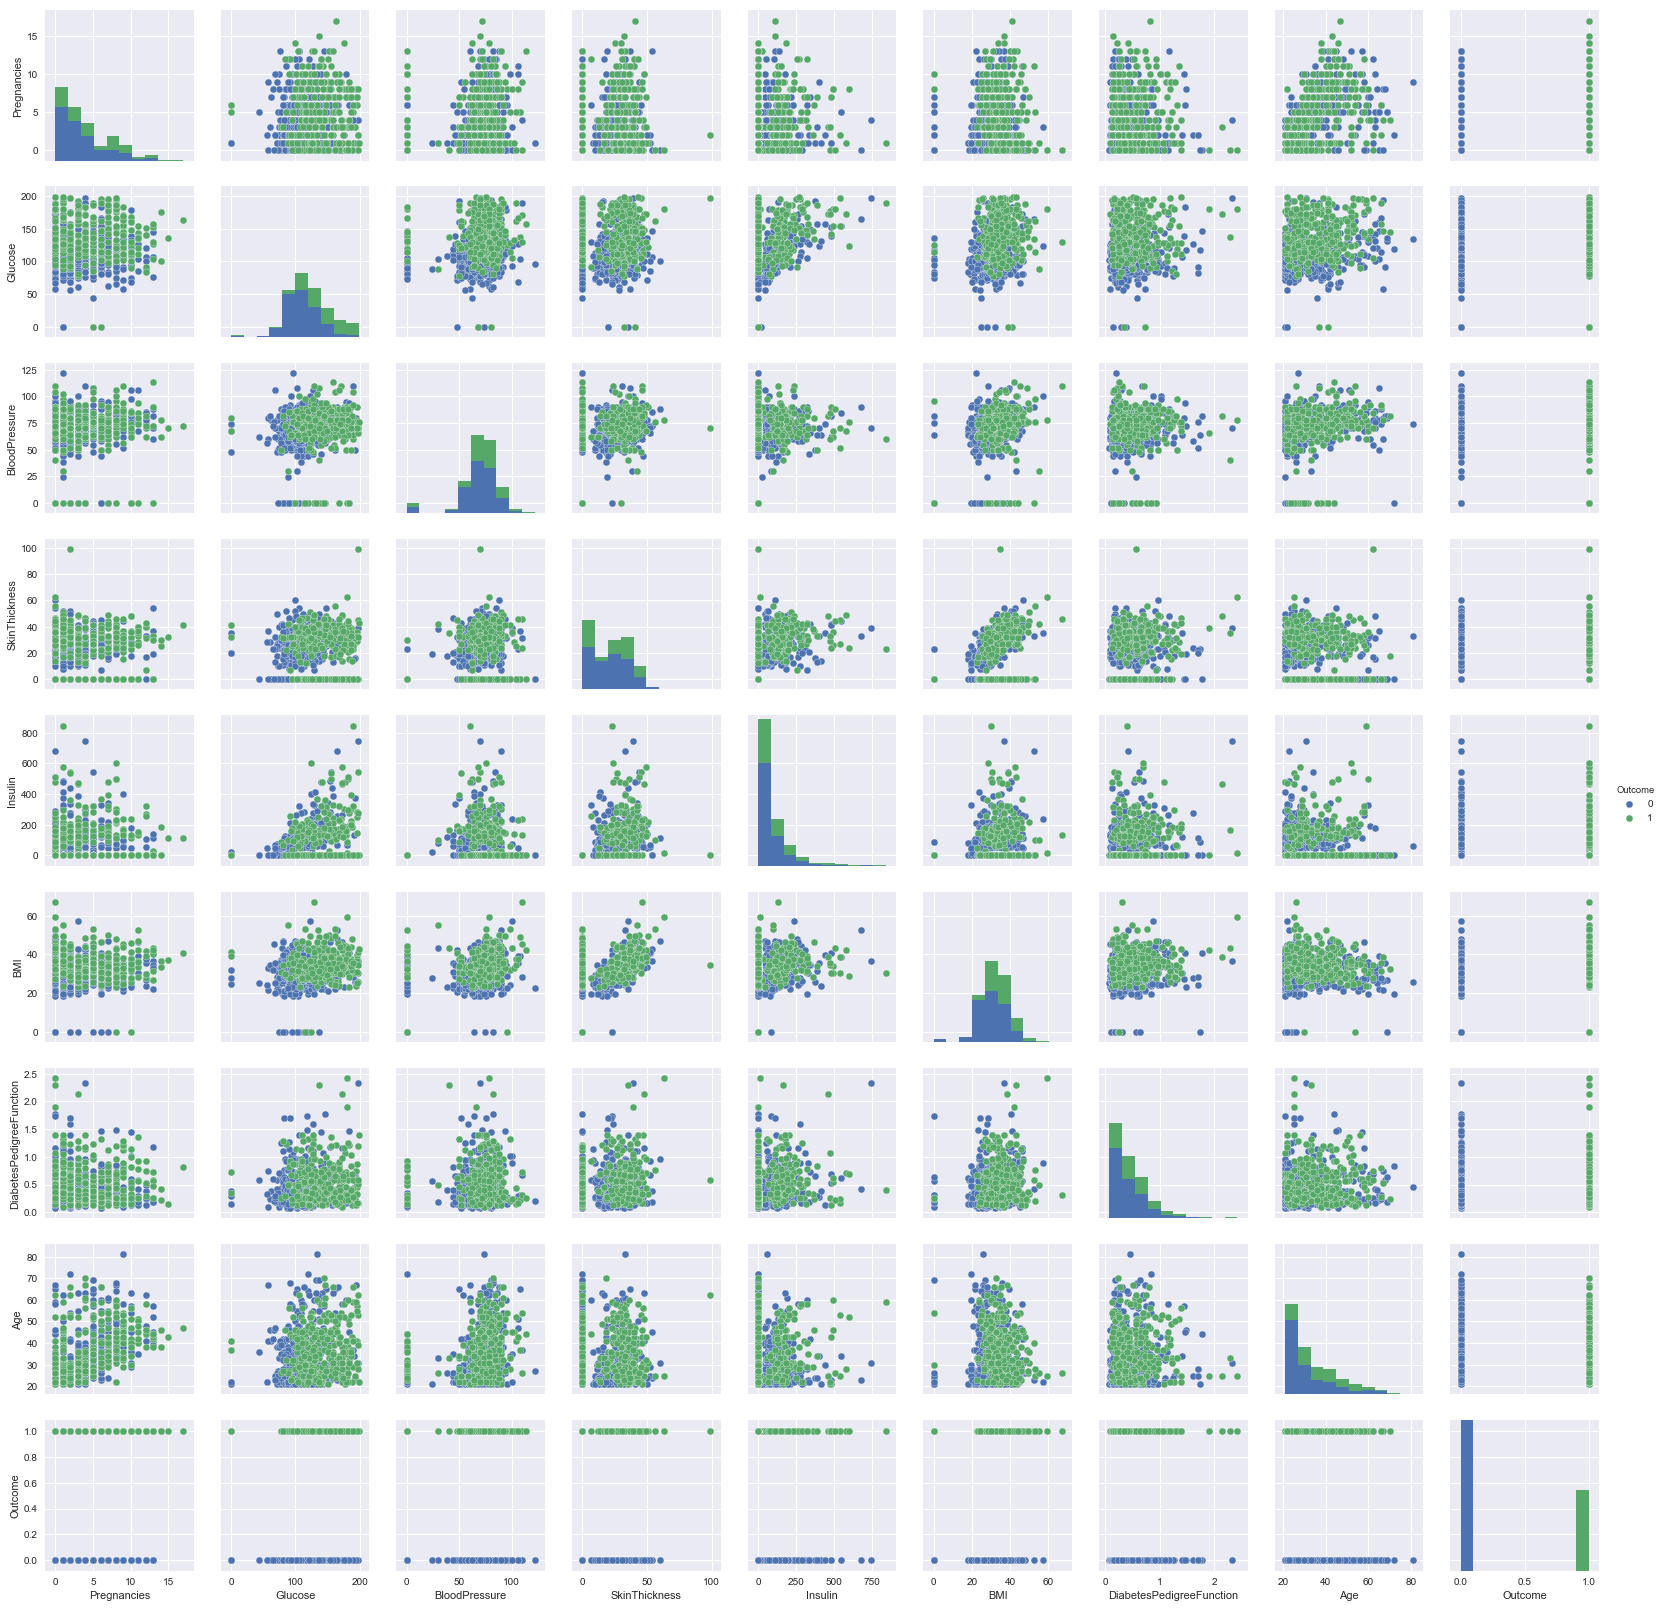

In [7]:
sns.pairplot(data = data, hue = 'Outcome', diag_kind = 'hist')
plt.show()

Observation: We find that none of the attributes stands strong enough to differentiate the outcome classes invidually.

Heat map to observe correlation between the attributes.

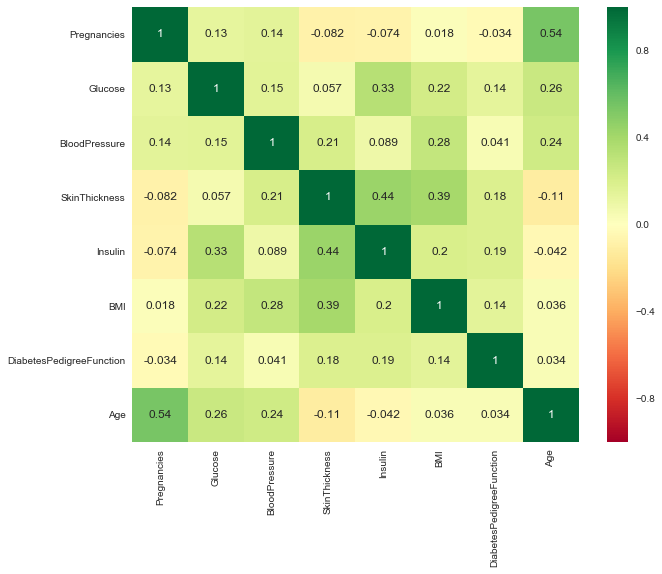

In [10]:
sns.heatmap(data[data.columns[:8]].corr(), annot = True, cmap = 'RdYlGn')
plt.gcf().set_size_inches(10, 8)
plt.show()

The heatmap tells us that the correlation matrix represented by it doesn't show much correlation between the attributes.

Setting X and Y

In [4]:
X = data[data.columns[0:8]]
Y = data['Outcome']

Selecting the best features using PCA and SelectKBest() and feeding them to pipeline.

In [5]:
features = []
features.append(('pca', PCA(n_components = 3)))
features.append(('SelectkBest', SelectKBest(k = 6)))
features = FeatureUnion(features)

Now, we use LDA and SVM after scaling the data for prediction.

In [6]:
estimators = []
estimators.append(('Standardize', StandardScaler()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('SVM_RBF', svm.SVC(kernel = 'rbf').fit(X, Y)))
model = Pipeline(estimators)

Now, we apply cross-validation with no. of folds = 10

In [105]:
seed = 7
kfold = KFold(n_splits = 10, random_state = seed)
predict = cross_val_predict(model, X, Y)
result = cross_val_score(model, X, Y, cv = kfold)
print("Mean accuracy is: ", result.mean())
print(predict)

Mean accuracy is:  0.7708304853041694
[1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1
 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0
 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1
 1 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0

In [106]:
result.mean()

0.7708304853041694